#Exploratory Data Analysis
This notebook explores the interactions between different variables of interest in the data

#Load libraries and data

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [40]:
cur_path = "/content/drive/MyDrive/Colab Notebooks/Capstone/"

In [41]:
#I had two separate datasets because of data collection issues so I merge them here
reports = pd.read_csv(cur_path+'10-Q_switches.csv')
reports2 = pd.read_csv(cur_path+'10-Q_switches2.csv')
reports = pd.concat([reports, reports2])
reports.reset_index(inplace=True)
reports.drop(['index', 'Unnamed: 0'], axis=1, inplace=True)
reports.head()

,cik,switch_type,switch,scale,year,qtr,dates,cash equivalents,total assets,total liabilities,total shareholders equity,net income,ce_change,asset_change,liabilities_change,se_change,net_income_change
0,2034,0,0,thousands,2018,1,2018-03-31,62032000.0,831280000.0,627898000.0,203382000.0,-196635000.0,0.0,0.0,0.0,0.0,0.0
1,2098,0,0,thousands,2017,3,2017-09-30,7021000.0,110938000.0,60218000.0,50720000.0,1202000.0,0.0,0.0,0.0,0.0,0.0
2,2098,0,0,thousands,2018,2,2018-06-30,1894000.0,118578000.0,66354000.0,52224000.0,2436000.0,-5127000.0,7640000.0,6136000.0,1504000.0,1234000.0
3,2098,0,0,thousands,2019,3,2019-09-30,5698000.0,114224000.0,59200000.0,55024000.0,1059000.0,3804000.0,-4354000.0,-7154000.0,2800000.0,-1377000.0
4,2186,0,0,thousands,2017,3,2017-09-30,8938000.0,46156000.0,9217000.0,36939000.0,600000.0,0.0,0.0,0.0,0.0,0.0


In [42]:
#save the full dataset
reports.to_csv(cur_path+"full_switches.csv", index=False)

In [43]:
#looking at companies with less than 50 billion in total assets to get rid of outliers
df = reports[reports['total assets']<50000000000]
df.reset_index(inplace=True)

In [49]:
#make switch type a string variable for graphing purposes
df['switch_type']=df['switch_type'].astype(str)

In [52]:
#This code will order the switch type when I graph it
switch_type = ['-1', '0', '1']
mapping = {scale: i for i, scale in enumerate(switch_type)}
key = df['switch_type'].map(mapping)

df = df.iloc[key.argsort()]

In [46]:
#This orders the scale
scale = ['ones', 'thousands', 'millions']
mapping = {scale: i for i, scale in enumerate(scale)}
key = df['scale'].map(mapping)

df = df.iloc[key.argsort()]

#Plotting
Below are an assortment of plots I was looking at to gain some insight from the data. 

##Interaction between numerical features

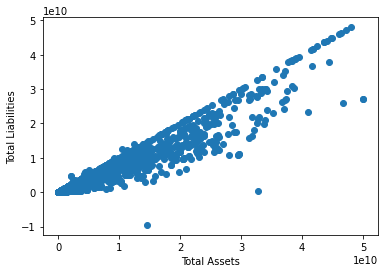

In [ ]:
plt.scatter(df['total assets'], df['total liabilities'] )
plt.xlabel("Total Assets")
plt.ylabel("Total Liabilities")
plt.show()

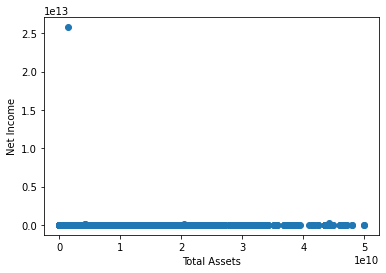

In [ ]:
plt.scatter(df['total assets'], df['net income'] )
plt.xlabel("Total Assets")
plt.ylabel("Net Income")
plt.show()

## How does total assets affect scale?

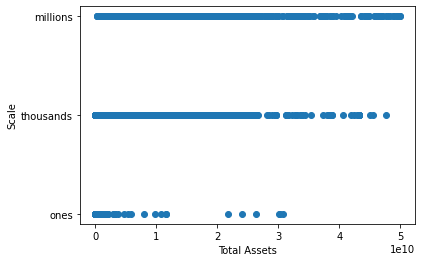

In [29]:
plt.scatter(df['total assets'], df['scale'] )
plt.xlabel("Total Assets")
plt.ylabel("Scale")
plt.show()

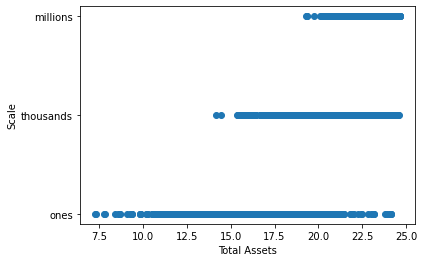

In [47]:
plt.scatter(np.log(df['total assets']), df['scale'] )
plt.xlabel("Total Assets")
plt.ylabel("Scale")
plt.show()

## Net Income and scale

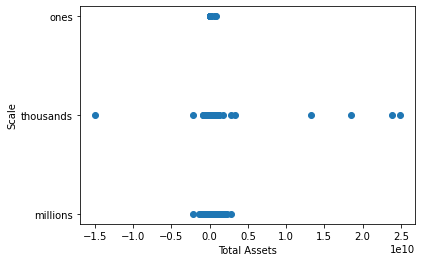

In [56]:
plt.scatter(df['net income'], df['scale'] )
plt.xlabel("Total Assets")
plt.ylabel("Scale")
plt.show()

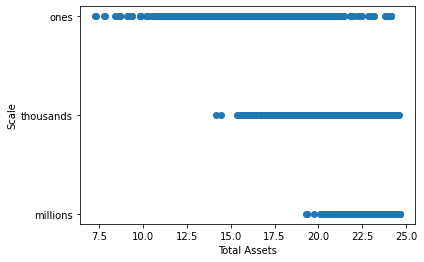

In [57]:
plt.scatter(np.log(df['total assets']), df['scale'] )
plt.xlabel("Total Assets")
plt.ylabel("Scale")
plt.show()

## Effect of total assets and net income on switch type

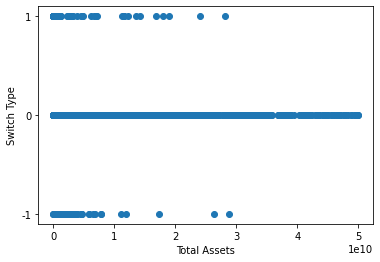

In [55]:
plt.scatter(df['total assets'], df['switch_type'] )
plt.xlabel("Total Assets")
plt.ylabel("Switch Type")
plt.show()

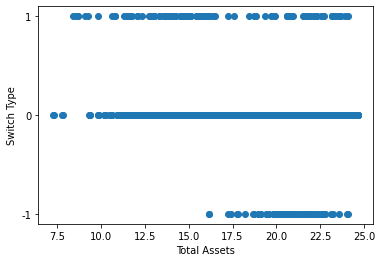

In [53]:
plt.scatter(np.log(df['total assets']), df['switch_type'] )
plt.xlabel("Total Assets")
plt.ylabel("Switch Type")
plt.show()

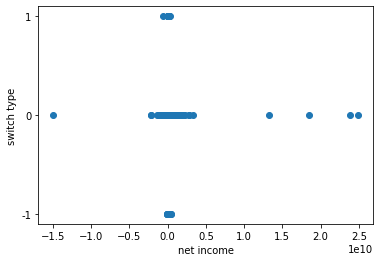

In [58]:
plt.scatter(df['net income'], df['switch_type'] )
plt.xlabel("net income")
plt.ylabel("switch type")
plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


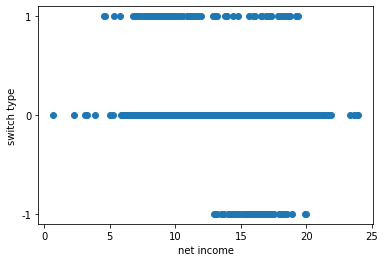

In [59]:
plt.scatter(np.log(df['net income']), df['switch_type'] )
plt.xlabel("net income")
plt.ylabel("switch type")
plt.show()

## Do change in values have an effect on the direction of the switch?

### Up switch

In [60]:
df_switch= df[df['switch_type']=='1']

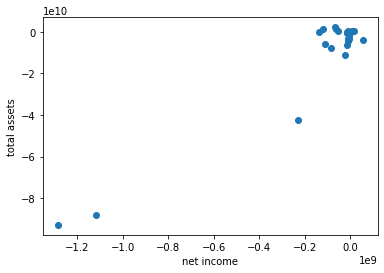

In [62]:
plt.scatter(df_switch['net_income_change'], df_switch['asset_change'])
plt.xlabel("net income")
plt.ylabel("total assets")
plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


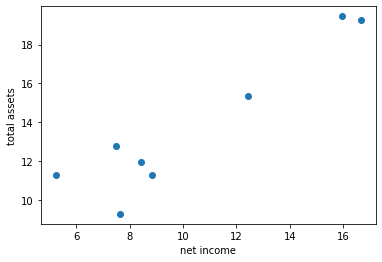

In [63]:
plt.scatter(np.log(df_switch['net_income_change']), np.log(df_switch['asset_change']))
plt.xlabel("net income")
plt.ylabel("total assets")
plt.show()

### Down switch

In [64]:
df_switch= df[df['switch_type']=='-1']

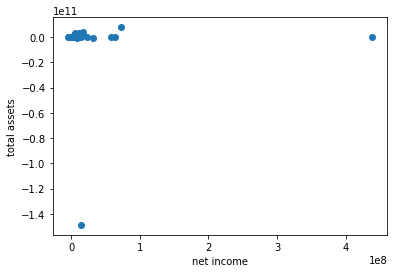

In [65]:
plt.scatter(df_switch['net_income_change'], df_switch['asset_change'])
plt.xlabel("net income")
plt.ylabel("total assets")
plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


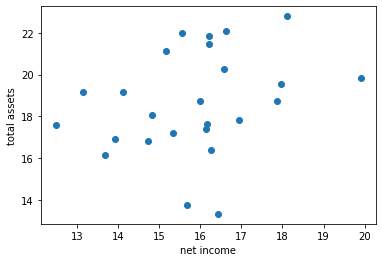

In [66]:
plt.scatter(np.log(df_switch['net_income_change']), np.log(df_switch['asset_change']))
plt.xlabel("net income")
plt.ylabel("total assets")
plt.show()

### The effect of changes of switches in general

#### Change in income

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


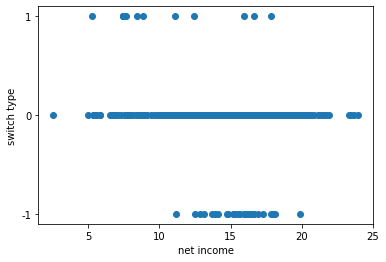

In [69]:
plt.scatter(np.log(df['net_income_change']), df['switch_type'])
plt.xlabel("net income")
plt.ylabel("switch type")
plt.show()

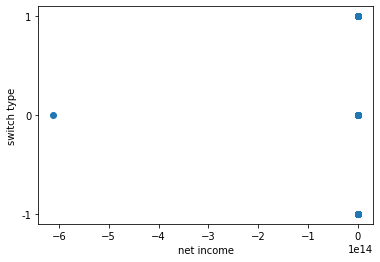

In [70]:
plt.scatter(df['net_income_change'], df['switch_type'])
plt.xlabel("net income")
plt.ylabel("switch type")
plt.show()

#### Change in assets

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


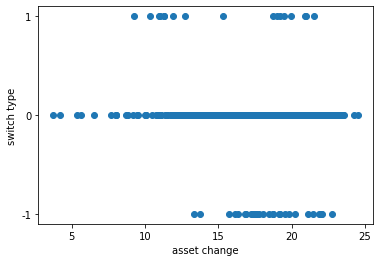

In [71]:
plt.scatter(np.log(df['asset_change']), df['switch_type'])
plt.xlabel("asset change")
plt.ylabel("switch type")
plt.show()

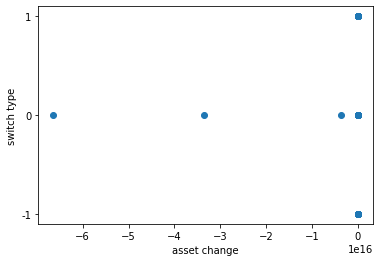

In [72]:
plt.scatter(df['asset_change'], df['switch_type'])
plt.xlabel("asset change")
plt.ylabel("switch type")
plt.show()